In [1]:
import mesa
from mesa import Model, Agent
from mesa.datacollection import DataCollector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from DataMarket_persona_welfare import DataMarket, Participants

/Users/oyama-kenshin/Desktop/Vault/05_Codes/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
persona_dist = {
    'Bandwagon': 0.6,
    'Neutral': 0.2,
    'Snob': 0.2
}

In [12]:
test_model = DataMarket(num_agents = 2, num_data = 10, initial_price = 110, persona_dist = persona_dist, wealth_alpha = 2, wealth_scale = 100, w1_params = (2, 100), tau=0.1, seed=None)

In [13]:
for _ in range(5):
    test_model.step()
    test_model.datacollector.collect(test_model)

In [14]:
model_df = test_model.datacollector.get_model_vars_dataframe()
agent_df = test_model.datacollector.get_agent_vars_dataframe()

print(model_df.head())
print(agent_df.head())


   Holders  ProviderRevenue
0        0                0
1        2              220
2        2              220
3        2              220
4        2              220
                     w_1         w_n     alpha      lamb  l_n_minus_1  \
Step AgentID                                                            
0    1        119.567534  105.796305  0.884825  0.802210   -95.918255   
     2        123.655778   25.737405  0.208138  0.255398   -31.581384   
1    1        119.567534  105.796305  0.884825  0.802210   -95.918255   
     2        123.655778   25.737405  0.208138  0.255398   -31.581384   
2    1        119.567534  105.796305  0.884825  0.802210   -95.918255   

              HasToken      Wealth    Persona  BoughtStep  CurrentUtility  
Step AgentID                                                               
0    1           False  159.505032  Bandwagon         NaN        0.000000  
     2           False  153.059421       Snob         NaN        0.000000  
1    1          

101.06738958985663


/var/folders/5r/f_b8tt1n79vbcql6f1yp4p9w0000gn/T/ipykernel_39765/724698954.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=initial_params, x='Persona', y='l_n_minus_1', ax=axes[1, 0], palette='viridis', order=['Bandwagon', 'Neutral', 'Snob'])
/var/folders/5r/f_b8tt1n79vbcql6f1yp4p9w0000gn/T/ipykernel_39765/724698954.py:107: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axes[1, 0].set_yscale('log')
/var/folders/5r/f_b8tt1n79vbcql6f1yp4p9w0000gn/T/ipykernel_39765/724698954.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=initial_params, x='Persona', y='w_n', ax=axes[1, 1], palette='viridis', order=['Bandwagon', 'Neutral', 'Snob'])


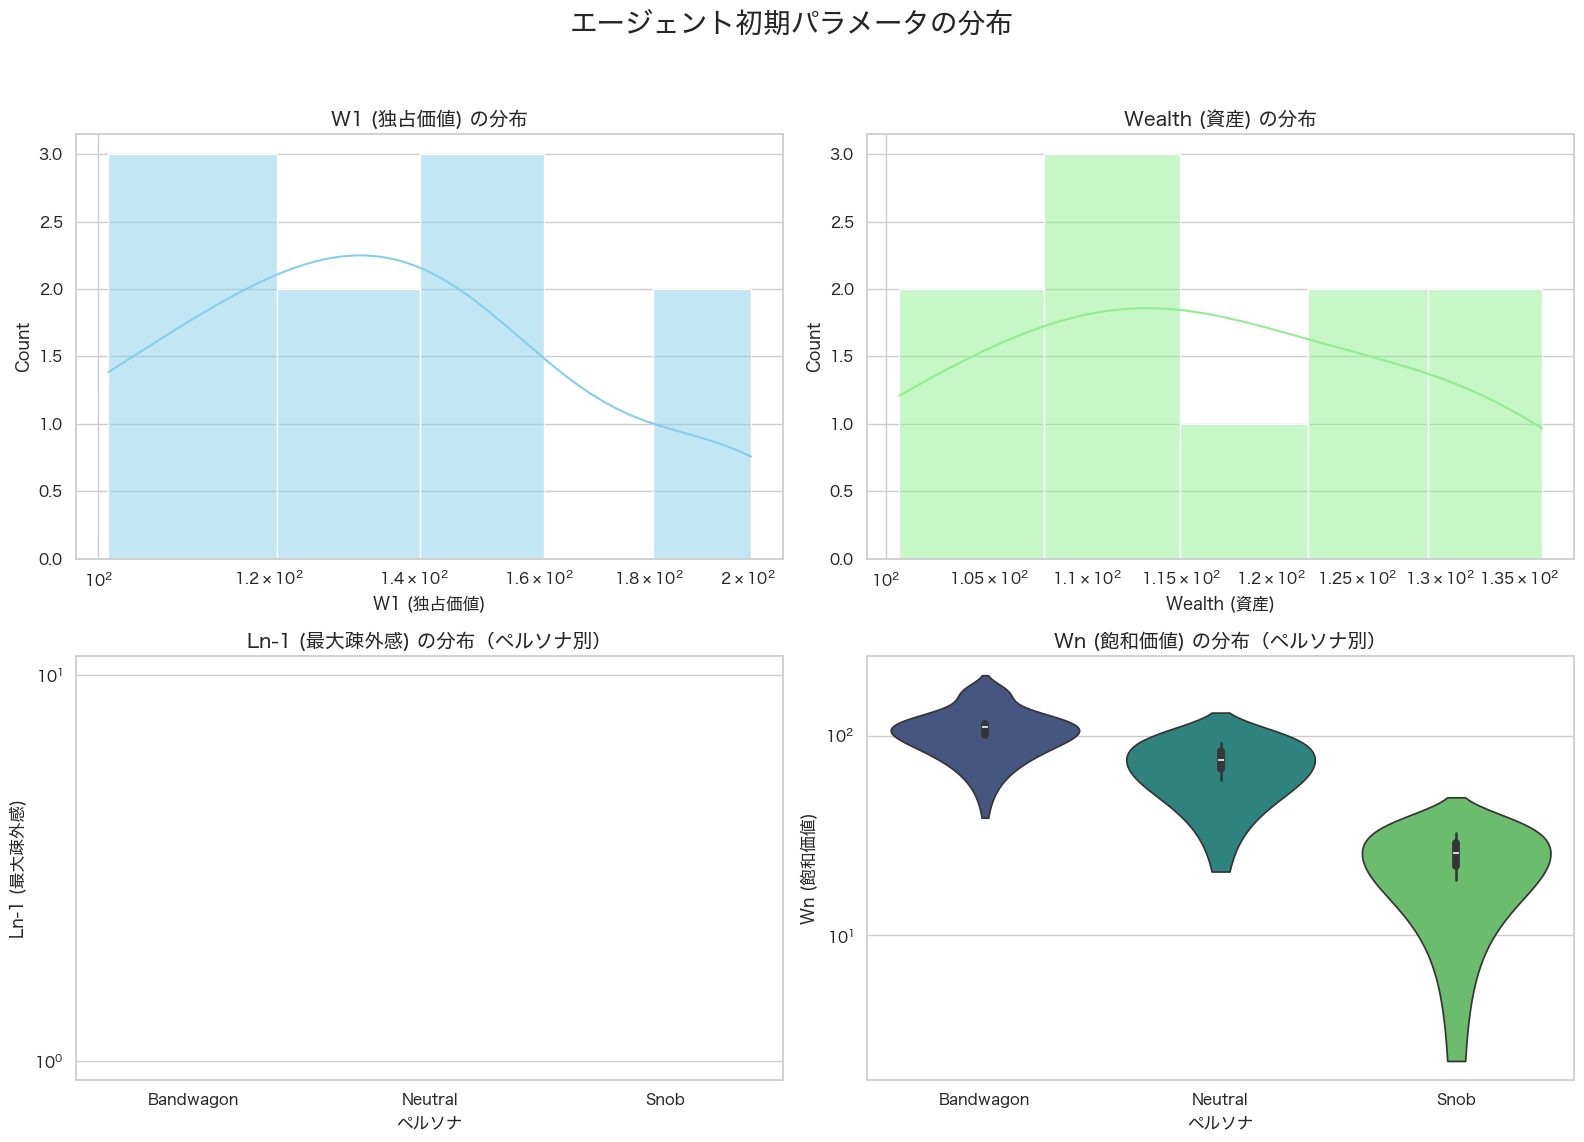

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_agent_parameters(model):
    """
    エージェントの初期パラメータ分布を可視化する。（詳細版）
    αとλの分布も表示する。

    Args:
        model: 初期化済みのMesaモデルインスタンス
    """
    agent_df = model.datacollector.get_agent_vars_dataframe()

    if 0 not in agent_df.index.get_level_values('Step'):
        print("ステップ0のデータが見つかりません。モデルが正しく初期化されているか確認してください。")
        return
        
    initial_params = agent_df.loc[0]

    try:
        sns.set_theme(style="whitegrid", font='Hiragino Sans')
    except RuntimeError:
        print("日本語フォント'Hiragino Sans'が見つかりません。英語表示にフォールバックします。")
        sns.set_theme(style="whitegrid")

    fig, axes = plt.subplots(3, 2, figsize=(15, 18))
    fig.suptitle('エージェントの初期パラメータ分布 (詳細)', fontsize=20)

    # 1. Wealth（資産）の分布
    sns.histplot(data=initial_params, x='Wealth', ax=axes[0, 0], kde=True)
    axes[0, 0].set_title('Wealth (資産) の分布', fontsize=14)
    axes[0, 0].set_xscale('log')

    # 2. w_1 (独占時の効用) の分布
    sns.histplot(data=initial_params, x='w_1', ax=axes[0, 1], kde=True)
    axes[0, 1].set_title('w_1 (独占時の効用) の分布', fontsize=14)
    axes[0, 1].set_xscale('log')

    # 3. Persona（ペルソナ）の分布
    sns.countplot(data=initial_params, x='Persona', ax=axes[1, 0], palette='viridis', order=['Bandwagon', 'Neutral', 'Snob'])
    axes[1, 0].set_title('Persona (ペルソナ) の分布', fontsize=14)

    # 4. Alpha (α) の分布（ペルソナ別）
    sns.histplot(data=initial_params, x='alpha', hue='Persona', ax=axes[1, 1], kde=True, multiple="stack", palette='viridis', hue_order=['Bandwagon', 'Neutral', 'Snob'])
    axes[1, 1].set_title('Alpha (α) の分布（ペルソナ別）', fontsize=14)

    # 5. Lambda (λ) の分布（ペルソナ別）
    sns.histplot(data=initial_params, x='lamb', hue='Persona', ax=axes[2, 0], kde=True, multiple="stack", palette='viridis', hue_order=['Bandwagon', 'Neutral', 'Snob'])
    axes[2, 0].set_title('Lambda (λ) の分布（ペルソナ別）', fontsize=14)

    # 6. Wealth vs w_1 の散布図
    sns.scatterplot(data=initial_params, x='Wealth', y='w_1', hue='Persona', ax=axes[2, 1], alpha=0.7, palette='viridis', hue_order=['Bandwagon', 'Neutral', 'Snob'])
    axes[2, 1].set_title('Wealth vs. w_1', fontsize=14)
    axes[2, 1].set_xscale('log')
    axes[2, 1].set_yscale('log')

    plt.tight_layout(rect=[0, 0.03, 1, 0.96])
    plt.show()


def visualize_initial_distributions(model):
    """
    シミュレーションの初期状態(Step 0)における主要なエージェントパラメータの分布を可視化する。
    W1, Wealth, Ln-1, Wn に特化。

    Args:
        model: 初期化済みのMesaモデルインスタンス
    """
    agent_df = model.datacollector.get_agent_vars_dataframe()

    if 0 not in agent_df.index.get_level_values('Step'):
        print("ステップ0のデータが見つかりません。モデルが正しく初期化されているか確認してください。")
        return
        
    initial_params = agent_df.loc[0]

    try:
        sns.set_theme(style="whitegrid", font='Hiragino Sans')
    except RuntimeError:
        print("日本語フォント'Hiragino Sans'が見つかりません。英語表示にフォールバックします。")
        sns.set_theme(style="whitegrid")

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('エージェント初期パラメータの分布', fontsize=20)
    
    print(min(initial_params['w_1']))

    # 1. W1 (独占価値) の分布
    sns.histplot(data=initial_params, x='w_1', ax=axes[0, 0], kde=True, color='skyblue')
    axes[0, 0].set_title('W1 (独占価値) の分布', fontsize=14)
    axes[0, 0].set_xlabel('W1 (独占価値)')
    axes[0, 0].set_xscale('log')
    
    

    # 2. Wealth (資産) の分布
    sns.histplot(data=initial_params, x='Wealth', ax=axes[0, 1], kde=True, color='lightgreen')
    axes[0, 1].set_title('Wealth (資産) の分布', fontsize=14)
    axes[0, 1].set_xlabel('Wealth (資産)')
    axes[0, 1].set_xscale('log')

    # 3. Ln-1 (最大疎外感) の分布（ペルソナ別）
    sns.boxplot(data=initial_params, x='Persona', y='l_n_minus_1', ax=axes[1, 0], palette='viridis', order=['Bandwagon', 'Neutral', 'Snob'])
    axes[1, 0].set_title('Ln-1 (最大疎外感) の分布（ペルソナ別）', fontsize=14)
    axes[1, 0].set_xlabel('ペルソナ')
    axes[1, 0].set_ylabel('Ln-1 (最大疎外感)')
    axes[1, 0].set_yscale('log')

    # 4. Wn (飽和価値) の分布（ペルソナ別）
    sns.violinplot(data=initial_params, x='Persona', y='w_n', ax=axes[1, 1], palette='viridis', order=['Bandwagon', 'Neutral', 'Snob'])
    axes[1, 1].set_title('Wn (飽和価値) の分布（ペルソナ別）', fontsize=14)
    axes[1, 1].set_xlabel('ペルソナ')
    axes[1, 1].set_ylabel('Wn (飽和価値)')
    axes[1, 1].set_yscale('log')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

visualize_initial_distributions(test_model)